<a href="https://colab.research.google.com/github/fsPyne/ML/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Step 1: Install required libraries
!pip install gspread pandas scikit-learn oauth2client

# Step 2: Load data from the uploaded CSV file
import pandas as pd
pd.set_option('display.max_colwidth', 1000)
# Load the data into a DataFrame
file_path = 'npsdataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
data.head(100)

,Which country do you live in?,How did you discover Tekla?,Which category(ies) did you purchase from for your most recent order?,How satisfied are you with the quality of the product(s) you received?,What could we do to improve?,How accurate were the product images and descriptions on the website?,Can you please specify any expectations that were not met?,"Based on your recent order, how likely are you to purchase from Tekla again?",Which category(ies) would you be most interested in purchasing from Tekla in the future?,How likely are you to recommend Tekla to friends and family?,"Based on your recent purchase, can you tell us what we did well or can do to improve your experience with Tekla in the future?",Submitted At,Token
0,Denmark,Friends/family,Sleepwear,9,NaN,9,NaN,10,"Sleepwear, Bedroom",10,It was a very good experience,11/29/2022 7:26:43,7c670qws7597pnjr7c670j4x1fdkuyne
1,Germany,Friends/family,Bathroom,10,NaN,10,NaN,9,"Bathroom, Sleepwear",10,"Es war sehr einfach, die Bestellung aufzugeben. Etwas Schwierigkeiten hatte ich beim Versand. Habe mich auch deshalb an Sie gewendet und sehr schnell und ausführlich Antwort erhalten. Damit Problem gelöst! Positiv: Sehr schneller Versand. Sehr gute Verpackung! Positiv:Extrem schneller ersand!",11/28/2022 14:13:29,kdzeves4urra8ivam1kdzeveot8zsv4e
2,Canada,Instagram (ad),"Bedroom, Sleepwear",10,NaN,10,NaN,10,"Bedroom, Sleepwear",10,"I love my new tells sheets and sleepwear set, which I will definitely be wear out! There would be room for improvement in the shipping. Fedex is terrible. I would recommend using DHL as they offer a much more reliable service. It would also be good to be able to pay for duties as part of the cost of goods. I buy from other companies outside of Canada who work this way. It makes for no surprises and straight forward delivery. Thank you!",11/28/2022 1:21:21,enplass5mpjcjhlenpin9q8o68f6t55o
3,France,Instagram (ad),Bedroom,8,NaN,9,NaN,7,"Bedroom, Bathroom",7,NaN,11/27/2022 13:12:26,k9r4zs7qavveqcyw5oqc6k9r4zsynbua
4,United States,Stussy Website. I purchased the pajamas.,Bedroom,10,NaN,10,NaN,10,"Bedroom, Sleepwear, Blankets",10,Perfection!,11/26/2022 3:48:24,5sm8cftejulccjnq5sm8cxwig93nr49y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Denmark,Friends/family,Bedroom,10,NaN,10,NaN,10,"Bedroom, Sleepwear, Bathroom, Kitchen",7,NaN,1/8/2023 19:17:00,6rbxxo6xbdlawx41wldztq6rbxxo6n1b
96,United Kingdom,Instagram (ad),Bathroom,10,NaN,10,NaN,10,"Bathroom, Kitchen, Blankets",10,Gift packaging was brilliant. Turned simple face cloth into gifting experience. Felt like a true little luxury.,1/9/2023 22:32:13,1n64onwwjn6d5kk7p2d1n64or4i354t6
97,Denmark,Friends/family,Sleepwear,10,NaN,10,NaN,10,Sleepwear,10,NaN,1/10/2023 13:32:29,metnl4gnfn0fd2pttmetn0vk1xw53nld
98,United Kingdom,Instagram (someone I follow),Bedroom,10,NaN,10,NaN,10,"Bedroom, Bathroom, Sleepwear",10,"The quality of the bedding is amazing. In addition, when I reported that there was a fault with one of the items, Tekla was kind enough to send a replacement - no questions asked.",1/11/2023 11:40:18,hv1q1rs7bjyfd5ssnfshv1q1rsqbqzro


In [30]:

# Step 3: Data Cleaning
# Remove duplicates
data.drop_duplicates(inplace=True)
pd.set_option('display.max_colwidth', 1000)

# Drop the "token" column if it exists
if 'token' in data.columns:
    data.drop(columns=['token'], inplace=True)

# Handle missing values by replacing null values with a placeholder
data['Based on your recent purchase, can you tell us what we did well or can do to improve your experience with Tekla in the future?'].fillna("No comment provided", inplace=True)

# Further text preprocessing (optional)
def preprocess_text(text):
    # Add text preprocessing steps here (e.g., lowercasing, removing punctuation)
    return text.lower()

data['cleaned_comment'] = data['Based on your recent purchase, can you tell us what we did well or can do to improve your experience with Tekla in the future?'].apply(preprocess_text)

# Step 4: Apply NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_comment'])

# Apply NMF
nmf = NMF(n_components=5, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# Identify top comments for each topic
feature_names = vectorizer.get_feature_names_out()

# Estimate sentiment of each comment
data['sentiment'] = data['cleaned_comment'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Identify the most positive and most negative comments
top_positive_comment = data.loc[data['sentiment'].idxmax()]['Based on your recent purchase, can you tell us what we did well or can do to improve your experience with Tekla in the future?']
top_negative_comment = data.loc[data['sentiment'].idxmin()]['Based on your recent purchase, can you tell us what we did well or can do to improve your experience with Tekla in the future?']

# Store the complete comments in variables
top_positive_comment_output = "Top Positive Comment:\n" + top_positive_comment
top_negative_comment_output = "Top Negative Comment:\n" + top_negative_comment

# Print the complete comments
print(top_positive_comment_output)
print(top_negative_comment_output)

# Prepare the output data
output_data = pd.DataFrame({
    'Top Positive Comment': [top_positive_comment if top_positive_comment else "No positive comment found"],
    'Top Negative Comment': [top_negative_comment if top_negative_comment else "No negative comment found"]
})

# Print the output data to ensure it is correct before exporting
print("Output Data:")
print(output_data)

# Save to CSV and provide a download link
output_file_path = '/NMF_Output.csv'
output_data.to_csv(output_file_path, index=False, quoting=1, encoding='utf-8')

# Verify the content of the CSV file
print("CSV file content:")
with open(output_file_path, 'r', encoding='utf-8') as file:
    print(file.read())

print("Process completed. The top positive and negative comments have been saved.")

# Provide download link
from google.colab import files
files.download(output_file_path)

Top Positive Comment:
Nothing at all, experience was perfect!
Top Negative Comment:
To receive the parcel via ups was a problem, it took 6 days when it was already in Berlin, terrible!
Output Data:
                      Top Positive Comment  \
0  Nothing at all, experience was perfect!   

                                                                                   Top Negative Comment  
0  To receive the parcel via ups was a problem, it took 6 days when it was already in Berlin, terrible!  
CSV file content:
"Top Positive Comment","Top Negative Comment"
"Nothing at all, experience was perfect!","To receive the parcel via ups was a problem, it took 6 days when it was already in Berlin, terrible!"

Process completed. The top positive and negative comments have been saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

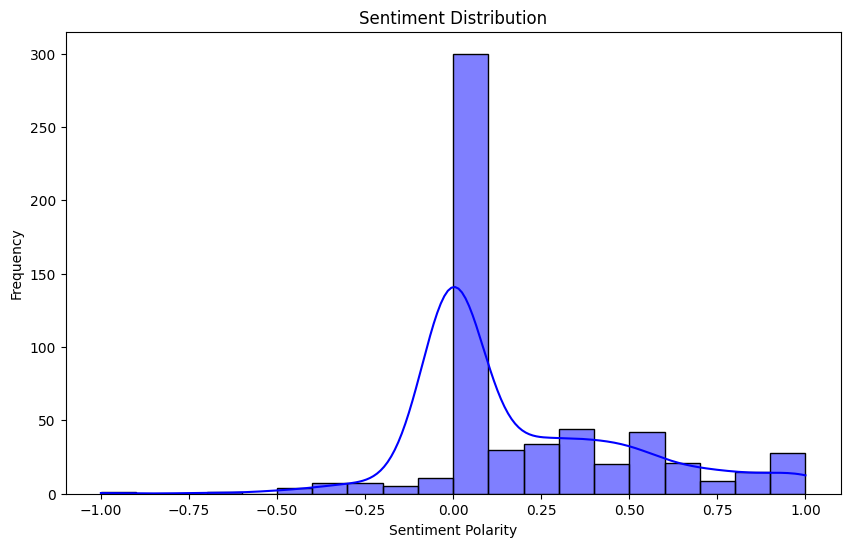

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=20, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


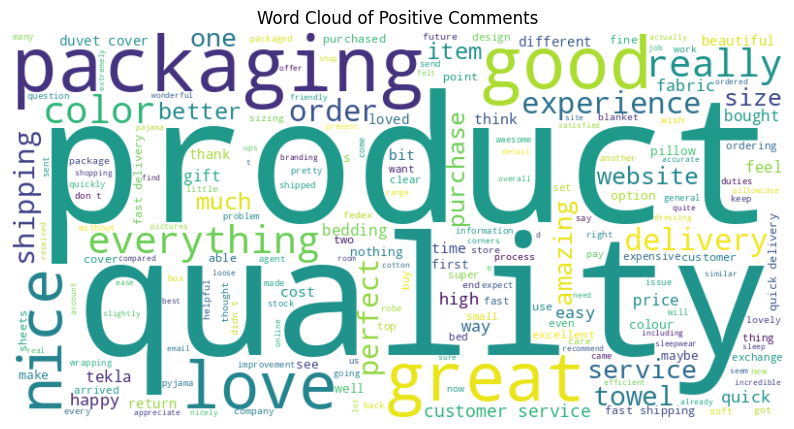

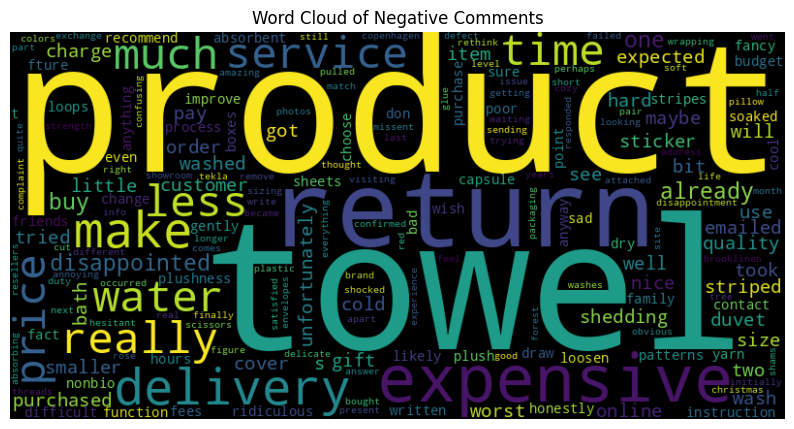

In [32]:
from wordcloud import WordCloud

# Generate word cloud for positive comments
positive_comments = ' '.join(data[data['sentiment'] > 0]['cleaned_comment'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)

# Generate word cloud for negative comments
negative_comments = ' '.join(data[data['sentiment'] < 0]['cleaned_comment'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_comments)

# Plot word cloud for positive comments
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Comments')
plt.axis('off')
plt.show()

# Plot word cloud for negative comments
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Negative Comments')
plt.axis('off')
plt.show()


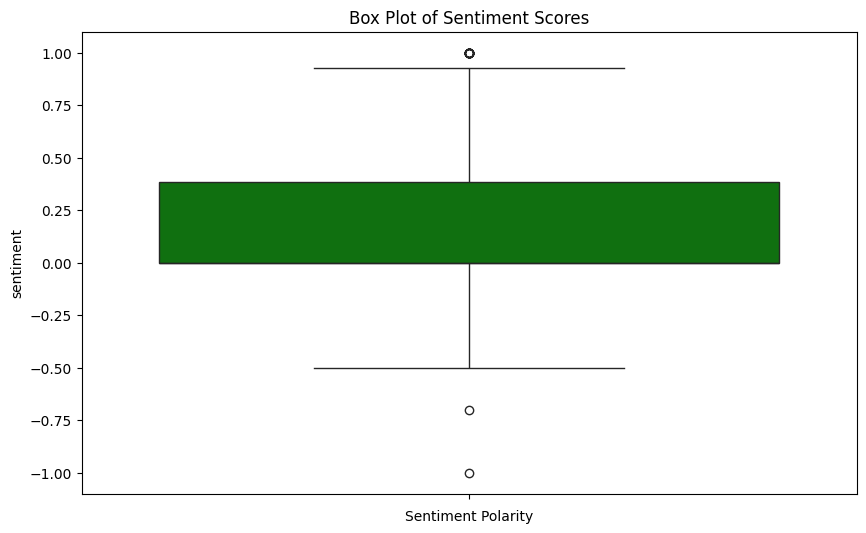

In [33]:
# Plot box plot of sentiment distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data['sentiment'], color='green')
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Polarity')
plt.show()


Here the refactored version starts, working towards productivization

In [ ]:
# Install required libraries
!pip install gspread pandas scikit-learn oauth2client textblob matplotlib seaborn wordcloud


In [ ]:
import os
import pandas as pd
from textblob import TextBlob

# Environment variables for file paths
DATA_FILE_PATH = os.getenv('DATA_FILE_PATH', '/mnt/data/Post Purchase Survey Results (New Customer) - Post Purchase – New Customers.csv')
OUTPUT_FILE_PATH = os.getenv('OUTPUT_FILE_PATH', '/mnt/data/NMF_Output.csv')

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def preprocess_data(data):
    if 'token' in data.columns:
        data.drop(columns=['token'], inplace=True)
    data.drop_duplicates(inplace=True)
    pd.set_option('display.max_colwidth', None)
    data['What could we do to improve?'].fillna("No comment provided", inplace=True)
    data['cleaned_comment'] = data['What could we do to improve?'].apply(lambda text: text.lower())
    return data

data = load_data(DATA_FILE_PATH)
if data is not None:
    data = preprocess_data(data)
    print("Data Sample:")
    print(data.head())
else:
    print("Failed to load data.")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def apply_nmf(data, n_components=5):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['cleaned_comment'])
    nmf = NMF(n_components=n_components, random_state=42)
    W = nmf.fit_transform(X)
    H = nmf.components_
    return W, H, vectorizer.get_feature_names_out()

def estimate_sentiment(data):
    data['sentiment'] = data['cleaned_comment'].apply(lambda text: TextBlob(text).sentiment.polarity)
    return data

def identify_top_comments(data, n=5):
    top_positive_comments = data.nlargest(n, 'sentiment')['What could we do to improve?']
    top_negative_comments = data.nsmallest(n, 'sentiment')['What could we do to improve?']
    return top_positive_comments, top_negative_comments

def save_output(top_positive_comments, top_negative_comments, file_path):
    output_data = pd.DataFrame({
        'Top Positive Comment': [comment for comment in top_positive_comments],
        'Top Negative Comment': [comment for comment in top_negative_comments]
    })
    output_data.to_csv(file_path, index=False, quoting=1, encoding='utf-8')
    print("\nOutput Data:")
    print(output_data)

W, H, feature_names = apply_nmf(data)
data = estimate_sentiment(data)
top_positive_comments, top_negative_comments = identify_top_comments(data)

# Print the top 5 positive comments
print("Top 5 Positive Comments:")
for i, comment in enumerate(top_positive_comments, 1):
    print(f"{i}. {comment}")

# Print the top 5 negative comments
print("\nTop 5 Negative Comments:")
for i, comment in enumerate(top_negative_comments, 1):
    print(f"{i}. {comment}")

save_output(top_positive_comments, top_negative_comments, OUTPUT_FILE_PATH)

print("Process completed. The top positive and negative comments have been saved.")

# Provide download link
from google.colab import files
files.download(OUTPUT_FILE_PATH)


In [ ]:
from wordcloud import WordCloud

def visualize_wordclouds(data):
    positive_comments = ' '.join(data[data['sentiment'] > 0]['cleaned_comment'])
    positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
    negative_comments = ' '.join(data[data['sentiment'] < 0]['cleaned_comment'])
    negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_comments)

    plt.figure(figsize=(10, 6))
    plt.imshow(positive_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Positive Comments')
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.imshow(negative_wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Negative Comments')
    plt.axis('off')
    plt.show()

visualize_wordclouds(data)
